<a href="https://colab.research.google.com/github/marcolo-30/Reconocimiento-de-Patrones-Run-or-Walk/blob/main/Run_or_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RECONOCIMIENTO DE PATRONES 



## Importamos las librerias que se utilizan durante el modelo

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sb
import scipy.stats as stats
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix


 #### Importamos el dataset y visualizamos su información

In [ ]:
from google.colab import files
files.upload()


Saving dataset.csv to dataset.csv


{'dataset.csv': b'date;time;username;wrist;activity;acceleration_x;acceleration_y;acceleration_z;gyro_x;gyro_y;gyro_z\r\n30/06/2017;13:51:15:847724020;viktor;0;0;0.2650;-0.7814;-0.0076;-0.0590;0.0325;-29.296\r\n30/06/2017;13:51:16:246945023;viktor;0;0;0.6722;-11.233;-0.2344;-0.1757;0.0208;0.1269\r\n30/06/2017;13:51:16:446233987;viktor;0;0;0.4399;-14.817;0.0722;-0.9105;0.1063;-24.367\r\n30/06/2017;13:51:16:646117985;viktor;0;0;0.3031;-0.8125;0.0888;0.1199;-0.4099;-29.336\r\n30/06/2017;13:51:16:846738994;viktor;0;0;0.4814;-0.9312;0.0359;0.0527;0.4379;24.922\r\n30/06/2017;13:51:17:46806991;viktor;0;0;0.4044;-0.8056;-0.0956;0.6925;-0.2179;25.750\r\n30/06/2017;13:51:17:246767997;viktor;0;0;0.6320;-11.290;-0.2982;0.0548;-0.1896;0.4473\r\n30/06/2017;13:51:17:446569025;viktor;0;0;0.6670;-13.503;-0.0880;-0.8094;-0.7938;-14.348\r\n30/06/2017;13:51:17:646152973;viktor;0;0;0.2704;-0.8633;0.1293;-0.4173;-0.1904;-26.759\r\n30/06/2017;13:51:17:846502006;viktor;0;0;0.4690;-10.740;0.0219;0.0388;11.491;

In [ ]:
datos = pd.read_csv("dataset.csv",sep=";",header=0)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


Se observa el tipo de dato que tiene cada una de las variables 

## Visualizamos los primeros 10 datos

In [ ]:
datos.head(15)

date                time username  ...  gyro_x   gyro_y   gyro_z
0   30/06/2017  13:51:15:847724020   viktor  ... -0.0590   0.0325 -29.2960
1   30/06/2017  13:51:16:246945023   viktor  ... -0.1757   0.0208   0.1269
2   30/06/2017  13:51:16:446233987   viktor  ... -0.9105   0.1063 -24.3670
3   30/06/2017  13:51:16:646117985   viktor  ...  0.1199  -0.4099 -29.3360
4   30/06/2017  13:51:16:846738994   viktor  ...  0.0527   0.4379  24.9220
5   30/06/2017   13:51:17:46806991   viktor  ...  0.6925  -0.2179  25.7500
6   30/06/2017  13:51:17:246767997   viktor  ...  0.0548  -0.1896   0.4473
7   30/06/2017  13:51:17:446569025   viktor  ... -0.8094  -0.7938 -14.3480
8   30/06/2017  13:51:17:646152973   viktor  ... -0.4173  -0.1904 -26.7590
9   30/06/2017  13:51:17:846502006   viktor  ...  0.0388  11.4910  16.9820
10  30/06/2017   13:51:18:46802997   viktor  ...  0.2326   0.4321  21.0090
11  30/06/2017  13:51:18:246815025   viktor  ...  0.1163  -0.1033  10.8220
12  30/06/2017  13:51:18:446740984   viktor  ... -0.4556  -0.5281 -12.4070
13  30/06/2017  13:51:18:646052002   viktor  ... -0.2345  -0.0148 -25.8840
14  30/06/2017  13:51:18:846947014   viktor  ... -0.1081   0.4016   0.6700

[15 rows x 11 columns]

In [ ]:
datos.value_counts(datos["date"].values)[1]

11365

### Analisis sobre los datos

In [ ]:
datos.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

No se encuentran valores nulos sobre el dataframe

In [ ]:
print("El dataset contiene " + str(pd.value_counts(datos["activity"].values)[0]) + " eventos caminando y " 
      + str(pd.value_counts(datos["activity"].values)[1]) + " eventos corriendo")

El dataset contiene 44223 eventos caminando y 44365 eventos corriendo


In [ ]:
caminando = datos[datos.activity == 0]
corriendo = datos[datos.activity == 1]
cam_izq=pd.value_counts(caminando["wrist"].values)[1]
cam_der=pd.value_counts(caminando["wrist"].values)[0]
cor_izq=pd.value_counts(corriendo["wrist"].values)[1]
cor_der=pd.value_counts(corriendo["wrist"].values)[0]

print ("Mediciones caminando con el dispositivo situado en la parte izquierda : "+str(cam_izq))
print ("Mediciones caminando con el dispositivo situado en la parte derecha : "+str(cam_der))
print ("--------------------------------------------------------------------------------")
print ("Mediciones corriendo con el dispositivo situado en la parte izquierda : "+str(cor_izq))
print ("Mediciones corriendo con el dispositivo situado en la parte derecha : "+str(cor_der))

Mediciones caminando con el dispositivo situado en la parte izquierda : 25601
Mediciones caminando con el dispositivo situado en la parte derecha : 18622
--------------------------------------------------------------------------------
Mediciones corriendo con el dispositivo situado en la parte izquierda : 20657
Mediciones corriendo con el dispositivo situado en la parte derecha : 23708


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


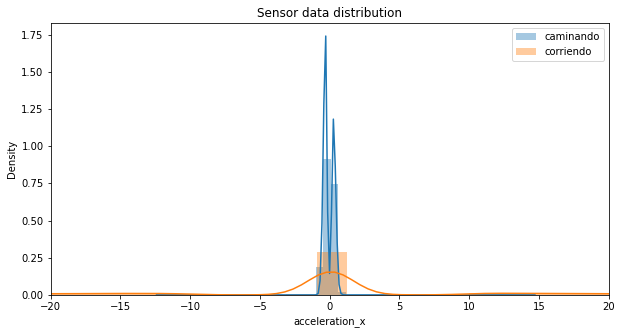

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


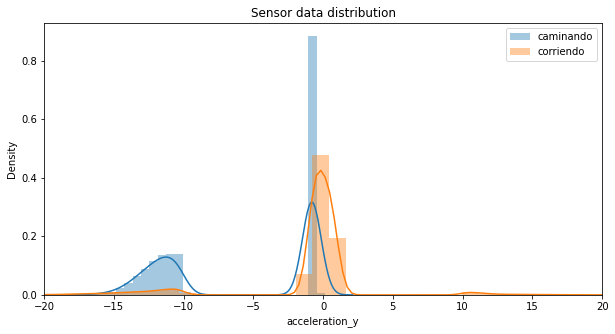

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


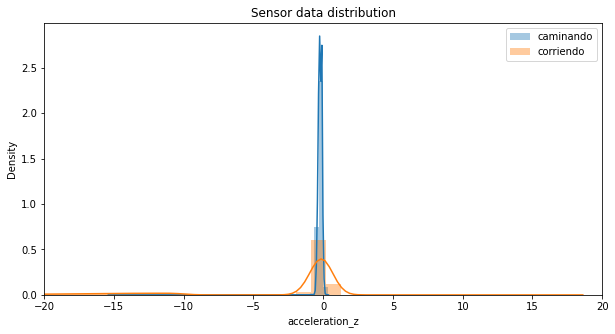

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


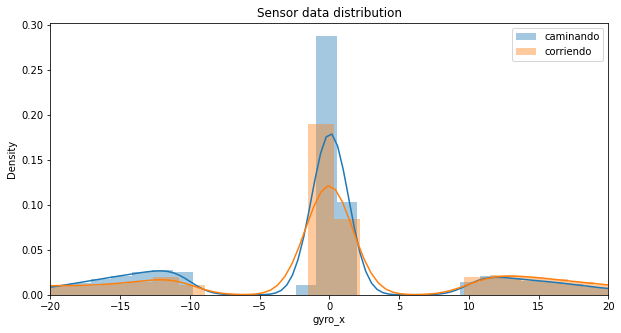

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


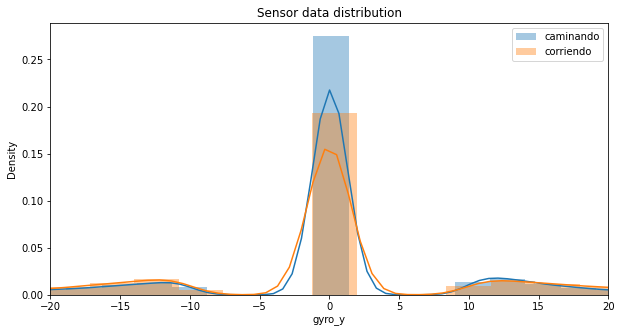

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


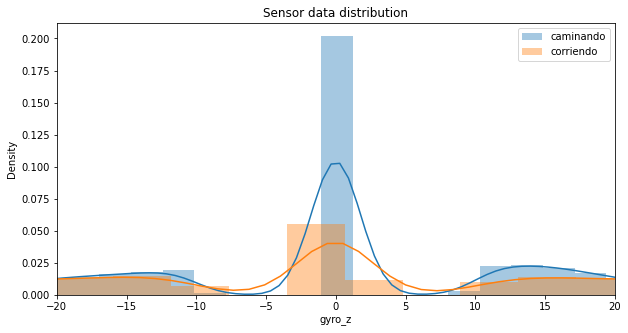

In [ ]:
sensores = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']
for c in sensores:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution")
    sb.distplot(caminando[c], label='caminando')
    sb.distplot(corriendo[c], label='corriendo')
    plt.legend()
    plt.xlim(-20,20)
    plt.show()
    

### Seleccion del vector de caractersticas

Estudios anteriores a demostrado que caracteristicas estadísticas basicas (promedio, desviación estandar, mínimos y maximos, entre otros) de la variables variables de clasificacion, son suficientes para poder clasificar correctamente la actividad.

Por tal motivo se concentrará la información solo teniendo en cuenta las aceleraciones y la variable de categorizacion o label.


In [ ]:
df = datos.drop(['date', 'time','username','wrist','gyro_x','gyro_y','gyro_z'], axis = 1).copy()
df2=datos.drop(['date', 'time','username','wrist','gyro_x','gyro_y','gyro_z'], axis = 1).copy()
df.columns = ['activity','X','Y','Z']
df2.columns = ['activity','X','Y','Z']
df.head(10)

activity       X        Y       Z
0         0  0.2650  -0.7814 -0.0076
1         0  0.6722 -11.2330 -0.2344
2         0  0.4399 -14.8170  0.0722
3         0  0.3031  -0.8125  0.0888
4         0  0.4814  -0.9312  0.0359
5         0  0.4044  -0.8056 -0.0956
6         0  0.6320 -11.2900 -0.2982
7         0  0.6670 -13.5030 -0.0880
8         0  0.2704  -0.8633  0.1293
9         0  0.4690 -10.7400  0.0219

Como observamos en el analisis de los datos hay más medidas en realizadas corriendo que caminando.
Por lo tanto balanceamos el numero de muestras para cada categoria

In [ ]:
caminando=df[df["activity"]==0].copy()
corriendo=df[df["activity"]==1].head(44223).copy()
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([caminando,corriendo])
df=balanced_data

caminando=df2[df2["activity"]==0].copy()
corriendo=df2[df2["activity"]==1].head(44223).copy()
balanced_data=pd.DataFrame()
balanced_data=balanced_data.append([caminando,corriendo])
df2=balanced_data

df.activity.value_counts()

1    44223
0    44223
Name: activity, dtype: int64

Las caracteristicas que la mayoria experimentos seleccionan en la revision bibliografica son:
Promedio, varianza, desviacion estandar ,valor min y max, valor RMS y la energia de cada una de las variables.

Para la extracción de características, se implementará y evaluará un enfoque de ventana deslizante con una duración de dos segundos y una superposición del 50%. Investigaciones anteriores muestran que este es un tamaño de ventana deslizante adecuado para el reconocimiento de actividad.

In [ ]:
datos.head(16)
#Observamos de la informacion de la tabla principal que cada 10 muestras se toma la informacion de aproximadamente dos segundos.
#con lo cual definimos el tamaño de ventana que sea 10 muestras y la superposicion de 5 muestras.

date                time username  ...  gyro_x   gyro_y   gyro_z
0   30/06/2017  13:51:15:847724020   viktor  ... -0.0590   0.0325 -29.2960
1   30/06/2017  13:51:16:246945023   viktor  ... -0.1757   0.0208   0.1269
2   30/06/2017  13:51:16:446233987   viktor  ... -0.9105   0.1063 -24.3670
3   30/06/2017  13:51:16:646117985   viktor  ...  0.1199  -0.4099 -29.3360
4   30/06/2017  13:51:16:846738994   viktor  ...  0.0527   0.4379  24.9220
5   30/06/2017   13:51:17:46806991   viktor  ...  0.6925  -0.2179  25.7500
6   30/06/2017  13:51:17:246767997   viktor  ...  0.0548  -0.1896   0.4473
7   30/06/2017  13:51:17:446569025   viktor  ... -0.8094  -0.7938 -14.3480
8   30/06/2017  13:51:17:646152973   viktor  ... -0.4173  -0.1904 -26.7590
9   30/06/2017  13:51:17:846502006   viktor  ...  0.0388  11.4910  16.9820
10  30/06/2017   13:51:18:46802997   viktor  ...  0.2326   0.4321  21.0090
11  30/06/2017  13:51:18:246815025   viktor  ...  0.1163  -0.1033  10.8220
12  30/06/2017  13:51:18:446740984   viktor  ... -0.4556  -0.5281 -12.4070
13  30/06/2017  13:51:18:646052002   viktor  ... -0.2345  -0.0148 -25.8840
14  30/06/2017  13:51:18:846947014   viktor  ... -0.1081   0.4016   0.6700
15  30/06/2017   13:51:19:46791970   viktor  ...  0.5714  -0.0506  21.3560

[16 rows x 11 columns]

In [ ]:
frame_size=10
hop_size=5
frame_x=[]
frame_y=[]
frame_z=[]
frame_xyz=[]
labels=[]

Se realiza un barrido por todo el data frame guardando en una lista los valores cada 10 muestras para su correspondiente uso.
Como los datos de caminar y correr fueron tomados secuencialmente puede pasar que en una ventana tome muestras de datos mezclados, para esto se realiza una aproximación encontrando la moda en cada una de las ventanas.

In [ ]:
for i in range(0,len(df)-frame_size,hop_size):
    x = df['X'].values[i: i + frame_size]
    y = df['Y'].values[i: i + frame_size]
    z = df['Z'].values[i: i + frame_size]
    label = stats.mode(df['activity'][i: i + frame_size])[0][0]
    frame_x.append([x])
    frame_y.append([y])
    frame_z.append([z])
    frame_xyz.append([x,y,z])
    labels.append(label)


Se realiza el calculo de las caracteristicas mencionadas 

In [ ]:
nom=len(frame_x)  #Number Of Measures  

mean_x = np.zeros(nom)
mean_y = np.zeros(nom)
mean_z = np.zeros(nom)
mean_xyz = np.zeros(nom)
var_x = np.zeros(nom)
var_y = np.zeros(nom)
var_z = np.zeros(nom)
var_xyz = np.zeros(nom)
sd_x = np.zeros(nom)
sd_y = np.zeros(nom)
sd_z = np.zeros(nom)
sd_xyz = np.zeros(nom)
max_x = np.zeros(nom)
max_y = np.zeros(nom)
max_z = np.zeros(nom)
max_xyz = np.zeros(nom)
min_x = np.zeros(nom)
min_y = np.zeros(nom)
min_z = np.zeros(nom)
min_xyz = np.zeros(nom)
rms_x = np.zeros(nom)
rms_y = np.zeros(nom)
rms_z = np.zeros(nom)
rms_xyz = np.zeros(nom)


for i in range(nom):

    mean_x[i]=np.mean(frame_x[i])
    mean_y[i]=np.mean(frame_y[i])
    mean_z[i]=np.mean(frame_z[i])
    mean_xyz[i]=np.mean(frame_xyz[i])
    var_x[i]=np.var(frame_x[i])
    var_y[i]=np.var(frame_y[i])
    var_z[i]=np.var(frame_z[i])
    var_xyz[i]=np.var(frame_xyz[i])
    max_x[i]=np.max(frame_x[i])
    max_y[i]=np.max(frame_y[i])
    max_z[i]=np.max(frame_z[i])
    max_xyz[i]=np.max(frame_xyz[i])
    min_x[i]=np.min(frame_x[i])
    min_y[i]=np.min(frame_y[i])
    min_z[i]=np.min(frame_z[i])
    min_xyz[i]=np.min(frame_xyz[i])
    sd_x[i]=np.std(frame_x[i])
    sd_y[i]=np.std(frame_y[i])
    sd_z[i]=np.std(frame_z[i])
    sd_xyz[i]=np.std(frame_xyz[i])
    




In [ ]:

df=np.matrix([labels,mean_x,mean_y,mean_z,mean_xyz,var_x,var_y,var_z,var_xyz,max_x,max_y,
              max_z,max_xyz,min_x,min_y,min_z,min_xyz,sd_x,sd_y,sd_z,sd_xyz])

df=np.transpose(df)
df=pd.DataFrame(df)

df.columns =["activity","mean_x","mean_y","mean_z","mean_xyz","var_x","var_y","var_z","var_xyz","max_x","max_y",
             "max_z","max_xyz","min_x","min_y","min_z","min_xyz","sd_x","sd_y","sd_z","sd_xyz"]

df['activity']=df['activity'].astype(np.int64)



In [ ]:
df.head()


activity   mean_x   mean_y   mean_z  ...      sd_x      sd_y      sd_z    sd_xyz
0         0  0.46044 -6.57770 -0.03757  ...  0.148353  5.845830  0.133521  4.657102
1         0  0.46848 -7.32059 -0.07718  ...  0.144375  5.392989  0.119817  4.723381
2         0  0.42823 -7.28047 -0.08427  ...  0.135511  5.376481  0.108300  4.693754
3         0  0.43808 -5.19729 -0.12475  ...  0.153848  5.412310  0.124029  4.024940
4         0  0.47561 -4.35174 -0.15237  ...  0.172564  5.360172  0.122011  3.766234

[5 rows x 21 columns]

In [ ]:
def cormtx(df, dropDuplicates = True):

    df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sb.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sb.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sb.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sb.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
 

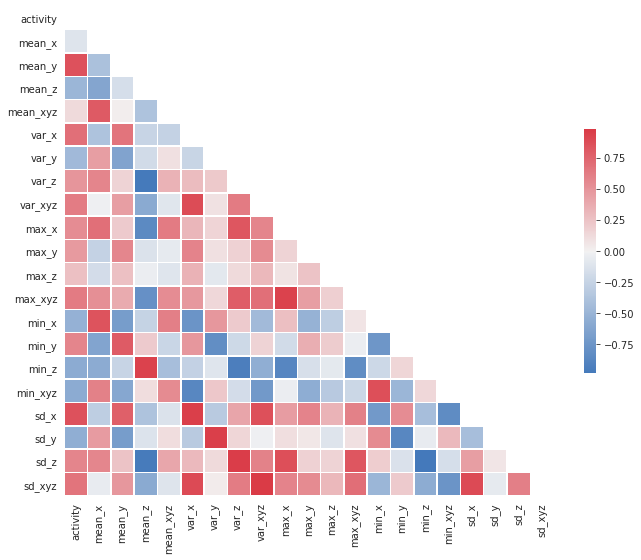

In [ ]:
cormtx(df)

In [ ]:
df.activity.value_counts()

1    8844
0    8844
Name: activity, dtype: int64

Dividimos el data set en entrenamiento y testeo


In [ ]:
np.random.seed(180693) 
train, test = train_test_split(df, test_size = 0.20)
train2, test2 = train_test_split(df2, test_size = 0.20)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  14150
Ejemplos usados para test:  3538


In [ ]:
x_train = train.iloc[:,1:20]
y_train = train.iloc[:,0]
 
x_test = test.iloc[:,1:20]
y_test = test.iloc[:,0]

x_train2 = train2.iloc[:,1:20]
y_train2 = train2.iloc[:,0]
 
x_test2 = test2.iloc[:,1:20]
y_test2 = test2.iloc[:,0]


y_test.value_counts()


0    1809
1    1729
Name: activity, dtype: int64

## KNN


In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(x_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [ ]:
knn2 = KNeighborsClassifier(2)
knn2.fit(x_train2, y_train2)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn2.score(x_train2, y_train2)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn2.score(x_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.97


In [ ]:
knnpred = knn.predict(x_test)
print(classification_report(y_test, knnpred))

knn.score(x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1809
           1       1.00      1.00      1.00      1729

    accuracy                           1.00      3538
   macro avg       1.00      1.00      1.00      3538
weighted avg       1.00      1.00      1.00      3538



0.9988694177501414

In [ ]:
knnpred2 = knn2.predict(x_test2)
print(classification_report(y_test2, knnpred2))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8928
           1       0.99      0.95      0.97      8762

    accuracy                           0.97     17690
   macro avg       0.97      0.97      0.97     17690
weighted avg       0.97      0.97      0.97     17690



[[1806    3]
 [   1 1728]]


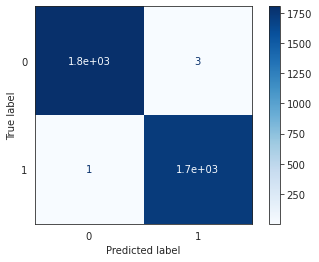

In [ ]:
print(confusion_matrix(y_test, knnpred))
plot_confusion_matrix(knn, x_test, y_test,cmap=plt.cm.Blues,)
plt.show()

[[8835   93]
 [ 469 8293]]


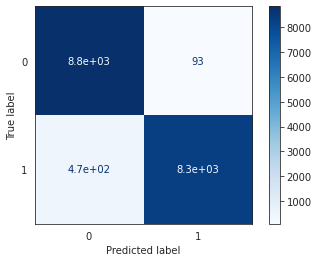

In [ ]:
print(confusion_matrix(y_test2, knnpred2))
plot_confusion_matrix(knn2, x_test2, y_test2,cmap=plt.cm.Blues,)
plt.show()

## Analisis Discriminante Linear 



In [ ]:
lds = LinearDiscriminantAnalysis()
lds.fit(x_train, y_train)
ldsy_predict = lds.predict(x_test)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lds.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lds.score(x_test, y_test)))


Accuracy of LDA classifier on training set: 0.99
Accuracy of LDA classifier on test set: 0.99


In [ ]:
lds2 = LinearDiscriminantAnalysis()
lds2.fit(x_train2, y_train2)
ldsy_predict2 = lds2.predict(x_test2)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lds2.score(x_train2, y_train2)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lds2.score(x_test2, y_test2)))

Accuracy of LDA classifier on training set: 0.70
Accuracy of LDA classifier on test set: 0.70


In [ ]:
print(classification_report(y_test,ldsy_predict))
lds.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1809
           1       1.00      0.99      0.99      1729

    accuracy                           0.99      3538
   macro avg       0.99      0.99      0.99      3538
weighted avg       0.99      0.99      0.99      3538



0.9943470887507067

In [ ]:
print(classification_report(y_test2,ldsy_predict2))
lds2.score(x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.89      0.47      0.61      8928
           1       0.63      0.94      0.76      8762

    accuracy                           0.70     17690
   macro avg       0.76      0.70      0.68     17690
weighted avg       0.76      0.70      0.68     17690



0.7014697569248163

[[1806    3]
 [  17 1712]]


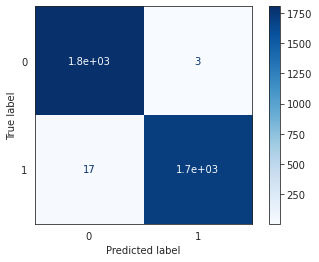

In [ ]:
print(confusion_matrix(y_test, ldsy_predict))
plot_confusion_matrix(lds, x_test, y_test,cmap=plt.cm.Blues,)
plt.show()

[[4181 4747]
 [ 534 8228]]


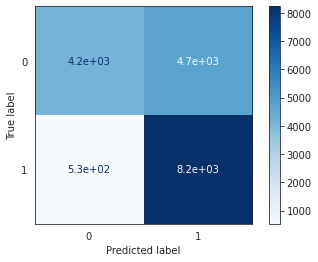

In [ ]:
print(confusion_matrix(y_test2, ldsy_predict2))

plot_confusion_matrix(lds2, x_test2, y_test2,cmap=plt.cm.Blues,)
plt.show()

## NAIVE BAYES



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnby_pred = gnb.fit(x_train, y_train).predict(x_test)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


In [ ]:
gnb2 = GaussianNB()
gnby_pred2 = gnb2.fit(x_train2, y_train2).predict(x_test2)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb2.score(x_train2, y_train2)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb2.score(x_test2, y_test2)))

Accuracy of GNB classifier on training set: 0.72
Accuracy of GNB classifier on test set: 0.73


In [ ]:
print(classification_report(y_test,gnby_pred))
gnb.score(x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1809
           1       1.00      1.00      1.00      1729

    accuracy                           1.00      3538
   macro avg       1.00      1.00      1.00      3538
weighted avg       1.00      1.00      1.00      3538



0.998304126625212

In [ ]:
print(classification_report(y_test2,gnby_pred2))
gnb2.score(x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      8928
           1       1.00      0.45      0.62      8762

    accuracy                           0.73     17690
   macro avg       0.82      0.72      0.70     17690
weighted avg       0.82      0.73      0.70     17690



0.727303561334087

[[1803    6]
 [   0 1729]]


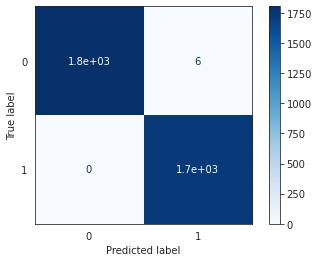

In [ ]:
print(confusion_matrix(y_test, gnby_pred))

plot_confusion_matrix(gnb, x_test, y_test,cmap=plt.cm.Blues,)
plt.show()

[[8923    5]
 [4819 3943]]


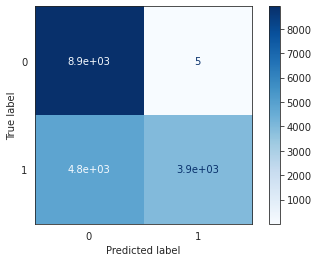

In [ ]:
print(confusion_matrix(y_test2, gnby_pred2))
plot_confusion_matrix(gnb2, x_test2, y_test2,cmap=plt.cm.Blues,)
plt.show()

## Maquinas de soporte vectorial 

In [ ]:
svm1=svm.SVC()
svm1pred = svm1.fit(x_train, y_train).predict(x_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm1.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm1.score(x_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.99


In [ ]:
svm2=svm.SVC()
svm2pred = svm2.fit(x_train2, y_train2).predict(x_test2)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm2.score(x_train2, y_train2)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm2.score(x_test2, y_test2)))

Accuracy of SVM classifier on training set: 0.94
Accuracy of SVM classifier on test set: 0.94


In [ ]:
print(classification_report(y_test,svm1pred))
svm1.score(x_test,y_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1809
           1       1.00      0.99      0.99      1729

    accuracy                           0.99      3538
   macro avg       0.99      0.99      0.99      3538
weighted avg       0.99      0.99      0.99      3538



0.9943470887507067

In [ ]:
print(classification_report(y_test2,svm2pred))
svm2.score(x_test2,y_test2)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8928
           1       0.99      0.89      0.94      8762

    accuracy                           0.94     17690
   macro avg       0.94      0.94      0.94     17690
weighted avg       0.94      0.94      0.94     17690



0.9391181458451102

[[1805    4]
 [  16 1713]]


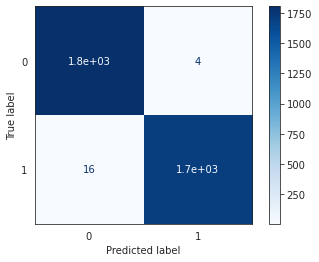

In [ ]:
print(confusion_matrix(y_test, svm1pred))
plot_confusion_matrix(svm1, x_test, y_test,cmap=plt.cm.Blues,)
plt.show()

[[8831   97]
 [ 980 7782]]


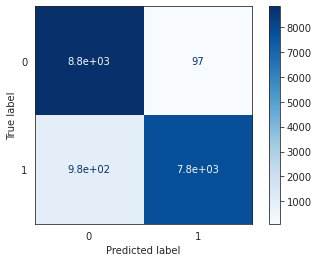

In [ ]:
print(confusion_matrix(y_test2, svm2pred))
plot_confusion_matrix(svm2, x_test2, y_test2,cmap=plt.cm.Blues,)
plt.show()